In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
ten_songs_df = pd.read_csv(r"C:\Users\Marvin\Documents\WBS\Data-Science-Bootcamp\6_Unsupervised ML\Data\6.3.2_spotify_10_songs.csv")
ten_songs_df

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band ...,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady ...,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março ...,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema ...,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black ...",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing ...,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix ...,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence ...,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


In [47]:
only_features = ten_songs_df.loc[:,"danceability ": "duration_ms "]
only_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773
1,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200
2,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400
3,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987
4,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267
5,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624
6,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720
7,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740
8,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800
9,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427


In [93]:
features_distances = pd.DataFrame(pairwise_distances(only_features), 
                                index=ten_songs_df.iloc[:,0], 
                                columns=ten_songs_df.iloc[:,0])
features_distances

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,14573.008837,86373.004053,19214.008255,96506.007937,49851.008569,139947.000755,94967.000742,188973.011466,30346.064036
The Real Slim Shady,14573.008837,0.000000,71800.011470,33787.011607,81933.018179,64424.015069,154520.002598,109540.002881,174400.007768,15773.072153
Águas De Março,86373.004053,71800.011470,0.000000,105587.001068,10133.013675,136224.000212,226320.000342,181340.000704,102600.034253,56027.060661
The Girl From Ipanema,19214.008255,33787.011607,105587.001068,0.000000,115720.004190,30637.006720,120733.000250,75753.000499,208187.011765,49560.047303
"Paint It, Black",96506.007937,81933.018179,10133.013675,115720.004190,0.000000,146357.000435,236453.001534,191473.002481,92467.054245,66160.073247
Sultans Of Swing,49851.008569,64424.015069,136224.000212,30637.006720,146357.000435,0.000000,90096.001470,45116.004743,238824.016881,80197.048230
Space Raiders - Charlotte de Witte Remix,139947.000755,154520.002598,226320.000342,120733.000250,236453.001534,90096.001470,0.000000,44980.000292,328920.008329,170293.015164
In Silence,94967.000742,109540.002881,181340.000704,75753.000499,191473.002481,45116.004743,44980.000292,0.000000,283940.008603,125313.018317
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",188973.011466,174400.007768,102600.034253,208187.011765,92467.054245,238824.016881,328920.008329,283940.008603,0.000000,158627.000245


## Min-Max-Scaler

In [48]:
# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))

In [49]:
# 3. fit the transformer to the data
my_min_max.fit(only_features)

MinMaxScaler()

In [50]:
# 4. use the transformer to transform the data
min_max_scaled_audio_features = my_min_max.transform(only_features)

In [67]:
# 5. reconvert the transformed data back to a DataFrame
min_max_scaled_audio_features = pd.DataFrame(min_max_scaled_audio_features,
index=only_features.index,
columns=only_features.columns)
min_max_scaled_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526
1,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220
2,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930
3,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941
4,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123
5,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085
6,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000
7,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249
8,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000
9,0.265359,0.043739,0.285714,0.292331,1.0,0.052150,1.000000,1.000000,0.188348,0.012856,0.000000,0.482266


In [92]:
min_max_distances = pd.DataFrame(pairwise_distances(min_max_scaled_audio_features), 
                                index=ten_songs_df.iloc[:,0], 
                                columns=ten_songs_df.iloc[:,0])
min_max_distances

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,0.865424,1.543712,1.890353,1.570970,1.519874,1.869464,1.771203,2.411953,2.335151
The Real Slim Shady,0.865424,0.000000,1.769612,1.713638,1.813472,1.459289,1.801010,1.773372,2.429310,2.336751
Águas De Março,1.543712,1.769612,0.000000,1.249081,1.435993,1.703637,1.656648,1.871919,1.695597,1.793372
The Girl From Ipanema,1.890353,1.713638,1.249081,0.000000,1.903296,1.538547,1.794488,1.891412,1.606433,1.535254
"Paint It, Black",1.570970,1.813472,1.435993,1.903296,0.000000,1.074686,1.705039,1.639784,2.278745,2.324324
Sultans Of Swing,1.519874,1.459289,1.703637,1.538547,1.074686,0.000000,1.686493,1.546424,2.405688,2.309939
Space Raiders - Charlotte de Witte Remix,1.869464,1.801010,1.656648,1.794488,1.705039,1.686493,0.000000,0.815132,2.185230,1.829474
In Silence,1.771203,1.773372,1.871919,1.891412,1.639784,1.546424,0.815132,0.000000,2.106382,1.732820
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2.411953,2.429310,1.695597,1.606433,2.278745,2.405688,2.185230,2.106382,0.000000,0.746570


## Standard-Scaler

In [52]:
scaler = StandardScaler().set_output(transform="pandas")
standard_scaled_audio_features = scaler.fit_transform(only_features)
standard_scaled_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.000384,0.992687,-1.138990,1.217434,-2.0,0.435538,0.146786,-0.816077,-0.349827,1.270021,0.040646,0.123210
1,1.451340,0.424153,0.759326,1.118976,-2.0,-0.299450,-0.952202,-0.816082,-1.002517,0.994657,-0.445036,-0.035980
2,0.038653,-0.549612,-0.189832,-0.168522,0.5,2.077778,0.987271,-0.816082,-0.451521,0.112834,0.773521,-0.820299
3,0.034052,-1.151411,2.183063,-0.315694,0.5,-0.821981,1.017877,-0.811999,-0.451521,-0.224816,0.331992,0.333097
4,-0.780429,0.829385,-1.138990,0.544582,0.5,0.716901,-0.907235,-0.810080,2.266479,0.509490,1.251782,-0.930989
5,0.457397,0.826361,0.759326,0.458132,0.5,-1.060278,-0.878748,-0.725811,1.628581,1.555220,0.922451,0.667766
6,0.531023,0.635842,0.284747,0.361846,0.5,1.159042,-1.015909,1.316484,-0.396051,-1.300705,0.415883,1.651944
7,0.471202,0.980591,-1.138990,0.230112,0.5,-0.859305,-1.010400,1.400114,-0.396051,-0.847664,0.291002,1.160598
8,-2.068872,-1.549596,-0.189832,-2.226872,0.5,-0.451616,1.305102,0.649903,-0.460766,-0.805048,-1.790384,-1.941067
9,-1.134751,-1.438400,-0.189832,-1.219995,0.5,-0.896629,1.307456,1.429630,-0.386806,-1.263989,-1.791856,-0.208279


In [91]:
standard_distances = pd.DataFrame(pairwise_distances(standard_scaled_audio_features), 
                                index=ten_songs_df.iloc[:,0], 
                                columns=ten_songs_df.iloc[:,0])
standard_distances

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,2.578940,4.307609,5.466394,4.592657,4.372589,4.986826e+00,4.588874,7.148962,6.451085
The Real Slim Shady,2.578940,0.000000,4.934214,4.638036,5.564666,4.246292,4.883249e+00,4.783076,7.132504,6.372499
Águas De Março,4.307609,4.934214,0.000000,4.007906,4.148369,5.034246,4.449713e+00,5.118546,5.196030,5.110853
The Girl From Ipanema,5.466394,4.638036,4.007906,0.000000,5.727819,4.281826,4.796051e+00,5.114359,5.121910,4.347306
"Paint It, Black",4.592657,5.564666,4.148369,5.727819,0.000000,3.531929,5.126744e+00,4.826710,6.613155,6.463656
Sultans Of Swing,4.372589,4.246292,5.034246,4.281826,3.531929,0.000000,4.782472e+00,4.332604,7.160400,6.401401
Space Raiders - Charlotte de Witte Remix,4.986826,4.883249,4.449713,4.796051,5.126744,4.782472,5.960464e-08,2.590333,6.701875,5.270419
In Silence,4.588874,4.783076,5.118546,5.114359,4.826710,4.332604,2.590333e+00,0.000000,6.311939,4.816074
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",7.148962,7.132504,5.196030,5.121910,6.613155,7.160400,6.701875e+00,6.311939,0.000000,2.433807


## Robust-Scaler

In [53]:
scaler = RobustScaler().set_output(transform="pandas")

robust_scaled_audio_features = scaler.fit_transform(only_features)
robust_scaled_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.688421,0.252893,-0.615385,1.149132,-1.0,0.541966,0.262798,-0.024496,0.50,0.775276,-0.268775,0.063605
1,1.101053,-0.057851,0.615385,1.026347,-1.0,0.050839,-0.300443,-0.024498,-6.56,0.614279,-0.750732,-0.063605
2,-0.191579,-0.590083,0.000000,-0.579272,0.0,1.639329,0.693554,-0.024498,-0.60,0.098706,0.458481,-0.690362
3,-0.195789,-0.919008,1.538462,-0.762808,0.0,-0.298321,0.709240,-0.022420,-0.60,-0.098706,0.020338,0.231328
4,-0.941053,0.163636,-0.615385,0.310029,0.0,0.729976,-0.277397,-0.021444,28.80,0.330618,0.933074,-0.778815
5,0.191579,0.161983,0.615385,0.202218,0.0,-0.457554,-0.262798,0.021444,21.90,0.942022,0.606269,0.498765
6,0.258947,0.057851,0.307692,0.082142,0.0,1.025420,-0.333094,1.060834,0.00,-0.727743,0.103585,1.285231
7,0.204211,0.246281,-0.615385,-0.082142,0.0,-0.323261,-0.330271,1.103396,0.00,-0.462865,-0.020338,0.892592
8,-2.120000,-1.136645,0.000000,-3.146208,0.0,-0.050839,0.856445,0.721590,-0.70,-0.437949,-2.085764,-1.585978
9,-1.265263,-1.075868,0.000000,-1.890549,0.0,-0.348201,0.857651,1.118418,0.10,-0.706277,-2.087225,-0.201291


In [90]:
robust_distances = pd.DataFrame(pairwise_distances(robust_scaled_audio_features), 
                                index=ten_songs_df.iloc[:,0], 
                                columns=ten_songs_df.iloc[:,0])
robust_distances

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,7.243834,3.163219,3.800093,28.424219,21.538032,3.019912,2.766760,6.312025,4.938145
The Real Slim Shady,7.243834,0.000000,6.860367,6.732711,35.517119,28.549140,7.226437,7.189922,8.472307,8.199640
Águas De Março,3.163219,6.860367,0.000000,2.709972,29.473987,22.702698,2.972492,3.326332,4.649716,4.031067
The Girl From Ipanema,3.800093,6.732711,2.709972,0.000000,29.596389,22.623484,3.045536,3.146500,4.505245,3.408987
"Paint It, Black",28.424219,35.517119,29.473987,29.596389,0.000000,7.344684,28.967661,28.941697,29.974287,29.066023
Sultans Of Swing,21.538032,28.549140,22.702698,22.623484,7.344684,0.000000,22.060786,22.021071,23.340658,22.284201
Space Raiders - Charlotte de Witte Remix,3.019912,7.226437,2.972492,3.045536,28.967661,22.060786,0.000000,1.725690,5.822596,4.233509
In Silence,2.766760,7.189922,3.326332,3.146500,28.941697,22.021071,1.725690,0.000000,5.441492,3.808716
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",6.312025,8.472307,4.649716,4.505245,29.974287,23.340658,5.822596,5.441492,0.000000,2.277325


## Quantile-Transformer

In [54]:
# Number of samples
number_of_samples = only_features.shape[0]

# Create a QuantileTransformer object
scaler = QuantileTransformer(n_quantiles = number_of_samples).set_output(transform="pandas")

# Transform the foods_df DataFrame
quantile_scaled_audio_features = scaler.fit_transform(only_features)

quantile_scaled_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.888889,1.000000,0.000000,1.000000,0.0,0.666667,0.555556,0.222222,0.777778,0.888889,0.333333,0.555556
1,1.000000,0.444444,0.888889,0.888889,0.0,0.555556,0.222222,0.000000,0.000000,0.777778,0.222222,0.444444
2,0.444444,0.333333,0.500000,0.333333,1.0,1.000000,0.666667,0.000000,0.277778,0.555556,0.777778,0.222222
3,0.333333,0.222222,1.000000,0.222222,1.0,0.333333,0.777778,0.333333,0.277778,0.444444,0.555556,0.666667
4,0.222222,0.777778,0.000000,0.777778,1.0,0.777778,0.333333,0.444444,1.000000,0.666667,1.000000,0.111111
5,0.555556,0.666667,0.888889,0.666667,1.0,0.000000,0.444444,0.555556,0.888889,1.000000,0.888889,0.777778
6,0.777778,0.555556,0.666667,0.555556,1.0,0.888889,0.000000,0.777778,0.500000,0.000000,0.666667,1.000000
7,0.666667,0.888889,0.000000,0.444444,1.0,0.222222,0.111111,0.888889,0.500000,0.222222,0.444444,0.888889
8,0.000000,0.000000,0.500000,0.000000,1.0,0.444444,0.888889,0.666667,0.111111,0.333333,0.111111,0.000000
9,0.111111,0.111111,0.500000,0.111111,1.0,0.111111,1.000000,1.000000,0.666667,0.111111,0.000000,0.333333


In [89]:
quantile_distances = pd.DataFrame(pairwise_distances(quantile_scaled_audio_features), 
                                index=ten_songs_df.iloc[:,0], 
                                columns=ten_songs_df.iloc[:,0])
quantile_distances

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,4.214685e-08,1.392218e+00,1.782979,2.049541,1.547599,1.753304,1.922094,1.689656e+00,2.347181,2.307396e+00
The Real Slim Shady,1.392218e+00,2.980232e-08,1.631102,1.663887,2.122775,1.832491,1.829963,2.003854e+00,2.111842,2.326047e+00
Águas De Março,1.782979e+00,1.631102e+00,0.000000,1.055556,1.283802,1.623515,1.508208,1.743595e+00,1.339108,1.754184e+00
The Girl From Ipanema,2.049541e+00,1.663887e+00,1.055556,0.000000,1.764709,1.238528,1.418572,1.590869e+00,1.130388,1.244742e+00
"Paint It, Black",1.547599e+00,2.122775e+00,1.283802,1.764709,0.000000,1.461438,1.637711,1.495879e+00,1.918880,1.953945e+00
Sultans Of Swing,1.753304e+00,1.832491e+00,1.623515,1.238528,1.461438,0.000000,1.552577,1.462494e+00,2.003854,1.819815e+00
Space Raiders - Charlotte de Witte Remix,1.922094e+00,1.829963e+00,1.508208,1.418572,1.637711,1.552577,0.000000,1.077262e+00,1.954735,1.857584e+00
In Silence,1.689656e+00,2.003854e+00,1.743595,1.590869,1.495879,1.462494,1.077262,4.214685e-08,1.857584,1.623515e+00
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2.347181e+00,2.111842e+00,1.339108,1.130388,1.918880,2.003854,1.954735,1.857584e+00,0.000000,8.678055e-01


## Power-Transformer

In [55]:
scaler = PowerTransformer().set_output(transform="pandas")
power_scaled_audio_features = scaler.fit_transform(only_features)
power_scaled_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.075317,1.078305,-1.323316,1.669676,-2.0,0.701909,0.374746,-0.851856,-0.078481,1.224185,-0.153505,0.097165
1,1.730514,0.308997,0.856157,1.413297,-2.0,-0.081333,-0.970704,-0.851869,-1.947847,1.000002,-0.666126,-0.064355
2,-0.100289,-0.718947,0.012636,-0.404512,0.5,1.644350,1.020441,-0.851869,-0.291008,0.208391,0.806331,-0.839203
3,-0.105232,-1.187652,1.748778,-0.535188,0.5,-0.869985,1.040181,-0.841586,-0.291008,-0.130399,0.200589,0.312094
4,-0.885990,0.843867,-1.323316,0.387232,0.5,0.927359,-0.897346,-0.836773,1.782122,0.579637,1.559634,-0.945429
5,0.376040,0.839630,0.856157,0.272369,0.5,-1.315126,-0.851966,-0.636517,1.635410,1.446581,1.029907,0.659174
6,0.465338,0.580179,0.470949,0.152030,0.5,1.219075,-1.078428,1.276120,-0.172277,-1.392002,0.309201,1.707746
7,0.392654,1.060559,-1.323316,-0.001417,0.5,-0.935765,-1.068930,1.304629,-0.172277,-0.821776,0.148609,1.179338
8,-1.777817,-1.434535,0.012636,-1.755960,0.5,-0.287525,1.215321,0.975409,-0.311480,-0.771330,-1.616974,-1.868875
9,-1.170535,-1.370404,0.012636,-1.197528,0.5,-1.002960,1.216685,1.314311,-0.153153,-1.343289,-1.617666,-0.237654


In [88]:
power_distances = pd.DataFrame(pairwise_distances(power_scaled_audio_features), 
                                index=ten_songs_df.iloc[:,0], 
                                columns=ten_songs_df.iloc[:,0])
power_distances

song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
song_name,,,,,,,,,,
My Band,0.000000,3.477687,4.596671e+00,5.660640,4.622203,4.880711,5.381597,4.937876e+00,7.020851e+00,6.667588
The Real Slim Shady,3.477687,0.000000,5.268528e+00,5.102437,6.326755,5.262109,5.372181,5.424805e+00,7.105623e+00,6.707325
Águas De Março,4.596671,5.268528,4.214685e-08,3.373505,3.831187,4.865783,4.577263,5.158709e+00,4.489381e+00,4.754170
The Girl From Ipanema,5.660640,5.102437,3.373505e+00,0.000000,5.499104,4.076398,4.739053,5.032976e+00,4.416530e+00,3.796875
"Paint It, Black",4.622203,6.326755,3.831187e+00,5.499104,0.000000,3.880130,5.105143,4.712586e+00,6.224121e+00,6.335750
Sultans Of Swing,4.880711,5.262109,4.865783e+00,4.076398,3.880130,0.000000,4.828457,4.277103e+00,6.683638e+00,6.093196
Space Raiders - Charlotte de Witte Remix,5.381597,5.372181,4.577263e+00,4.739053,5.105143,4.828457,0.000000,2.958611e+00,6.121260e+00,5.120429
In Silence,4.937876,5.424805,5.158709e+00,5.032976,4.712586,4.277103,2.958611,5.960464e-08,5.828965e+00,4.711388
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",7.020851,7.105623,4.489381e+00,4.416530,6.224121,6.683638,6.121260,5.828965e+00,8.429370e-08,2.079552


## Comparison

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

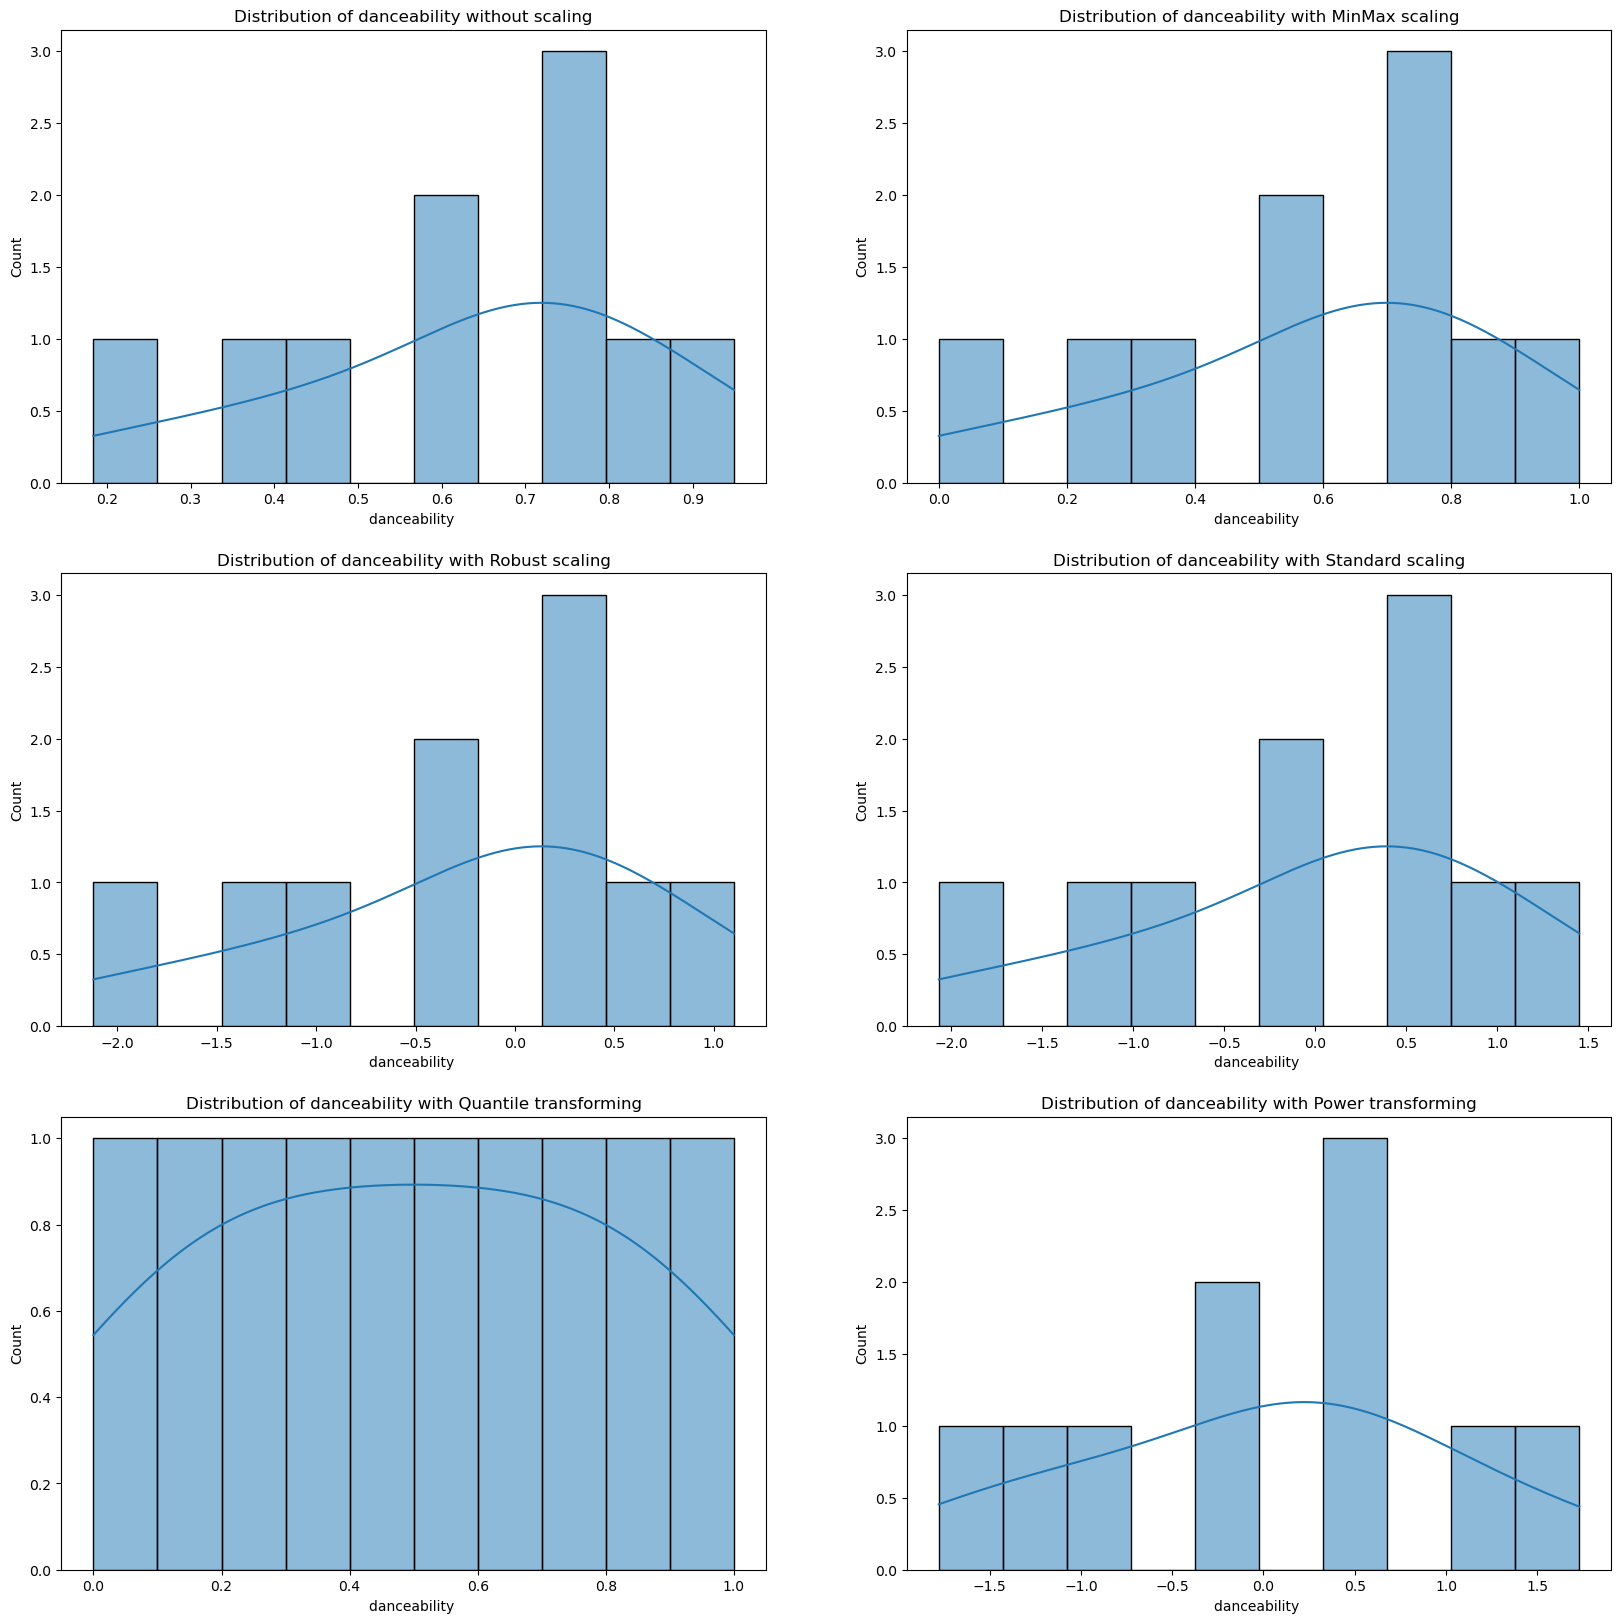

In [69]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data=only_features.iloc[:,0], bins=10, kde=True, ax=ax[0, 0]);
sns.histplot(data=min_max_scaled_audio_features.iloc[:,0], bins=10, kde=True, ax=ax[0, 1]);
sns.histplot(data=robust_scaled_audio_features.iloc[:,0], bins=10, kde=True, ax=ax[1, 0]);
sns.histplot(data=standard_scaled_audio_features.iloc[:,0], bins=10, kde=True, ax=ax[1, 1]);
sns.histplot(data=quantile_scaled_audio_features.iloc[:,0], bins=10, kde=True, ax=ax[2, 0]);
sns.histplot(data=power_scaled_audio_features.iloc[:,0], bins=10, kde=True, ax=ax[2, 1]);

ax[0, 0].set_title('Distribution of danceability without scaling')
ax[0, 1].set_title('Distribution of danceability with MinMax scaling')
ax[1, 0].set_title('Distribution of danceability with Robust scaling')
ax[1, 1].set_title('Distribution of danceability with Standard scaling')
ax[2, 0].set_title('Distribution of danceability with Quantile transforming')
ax[2, 1].set_title('Distribution of danceability with Power transforming')

plt.show()

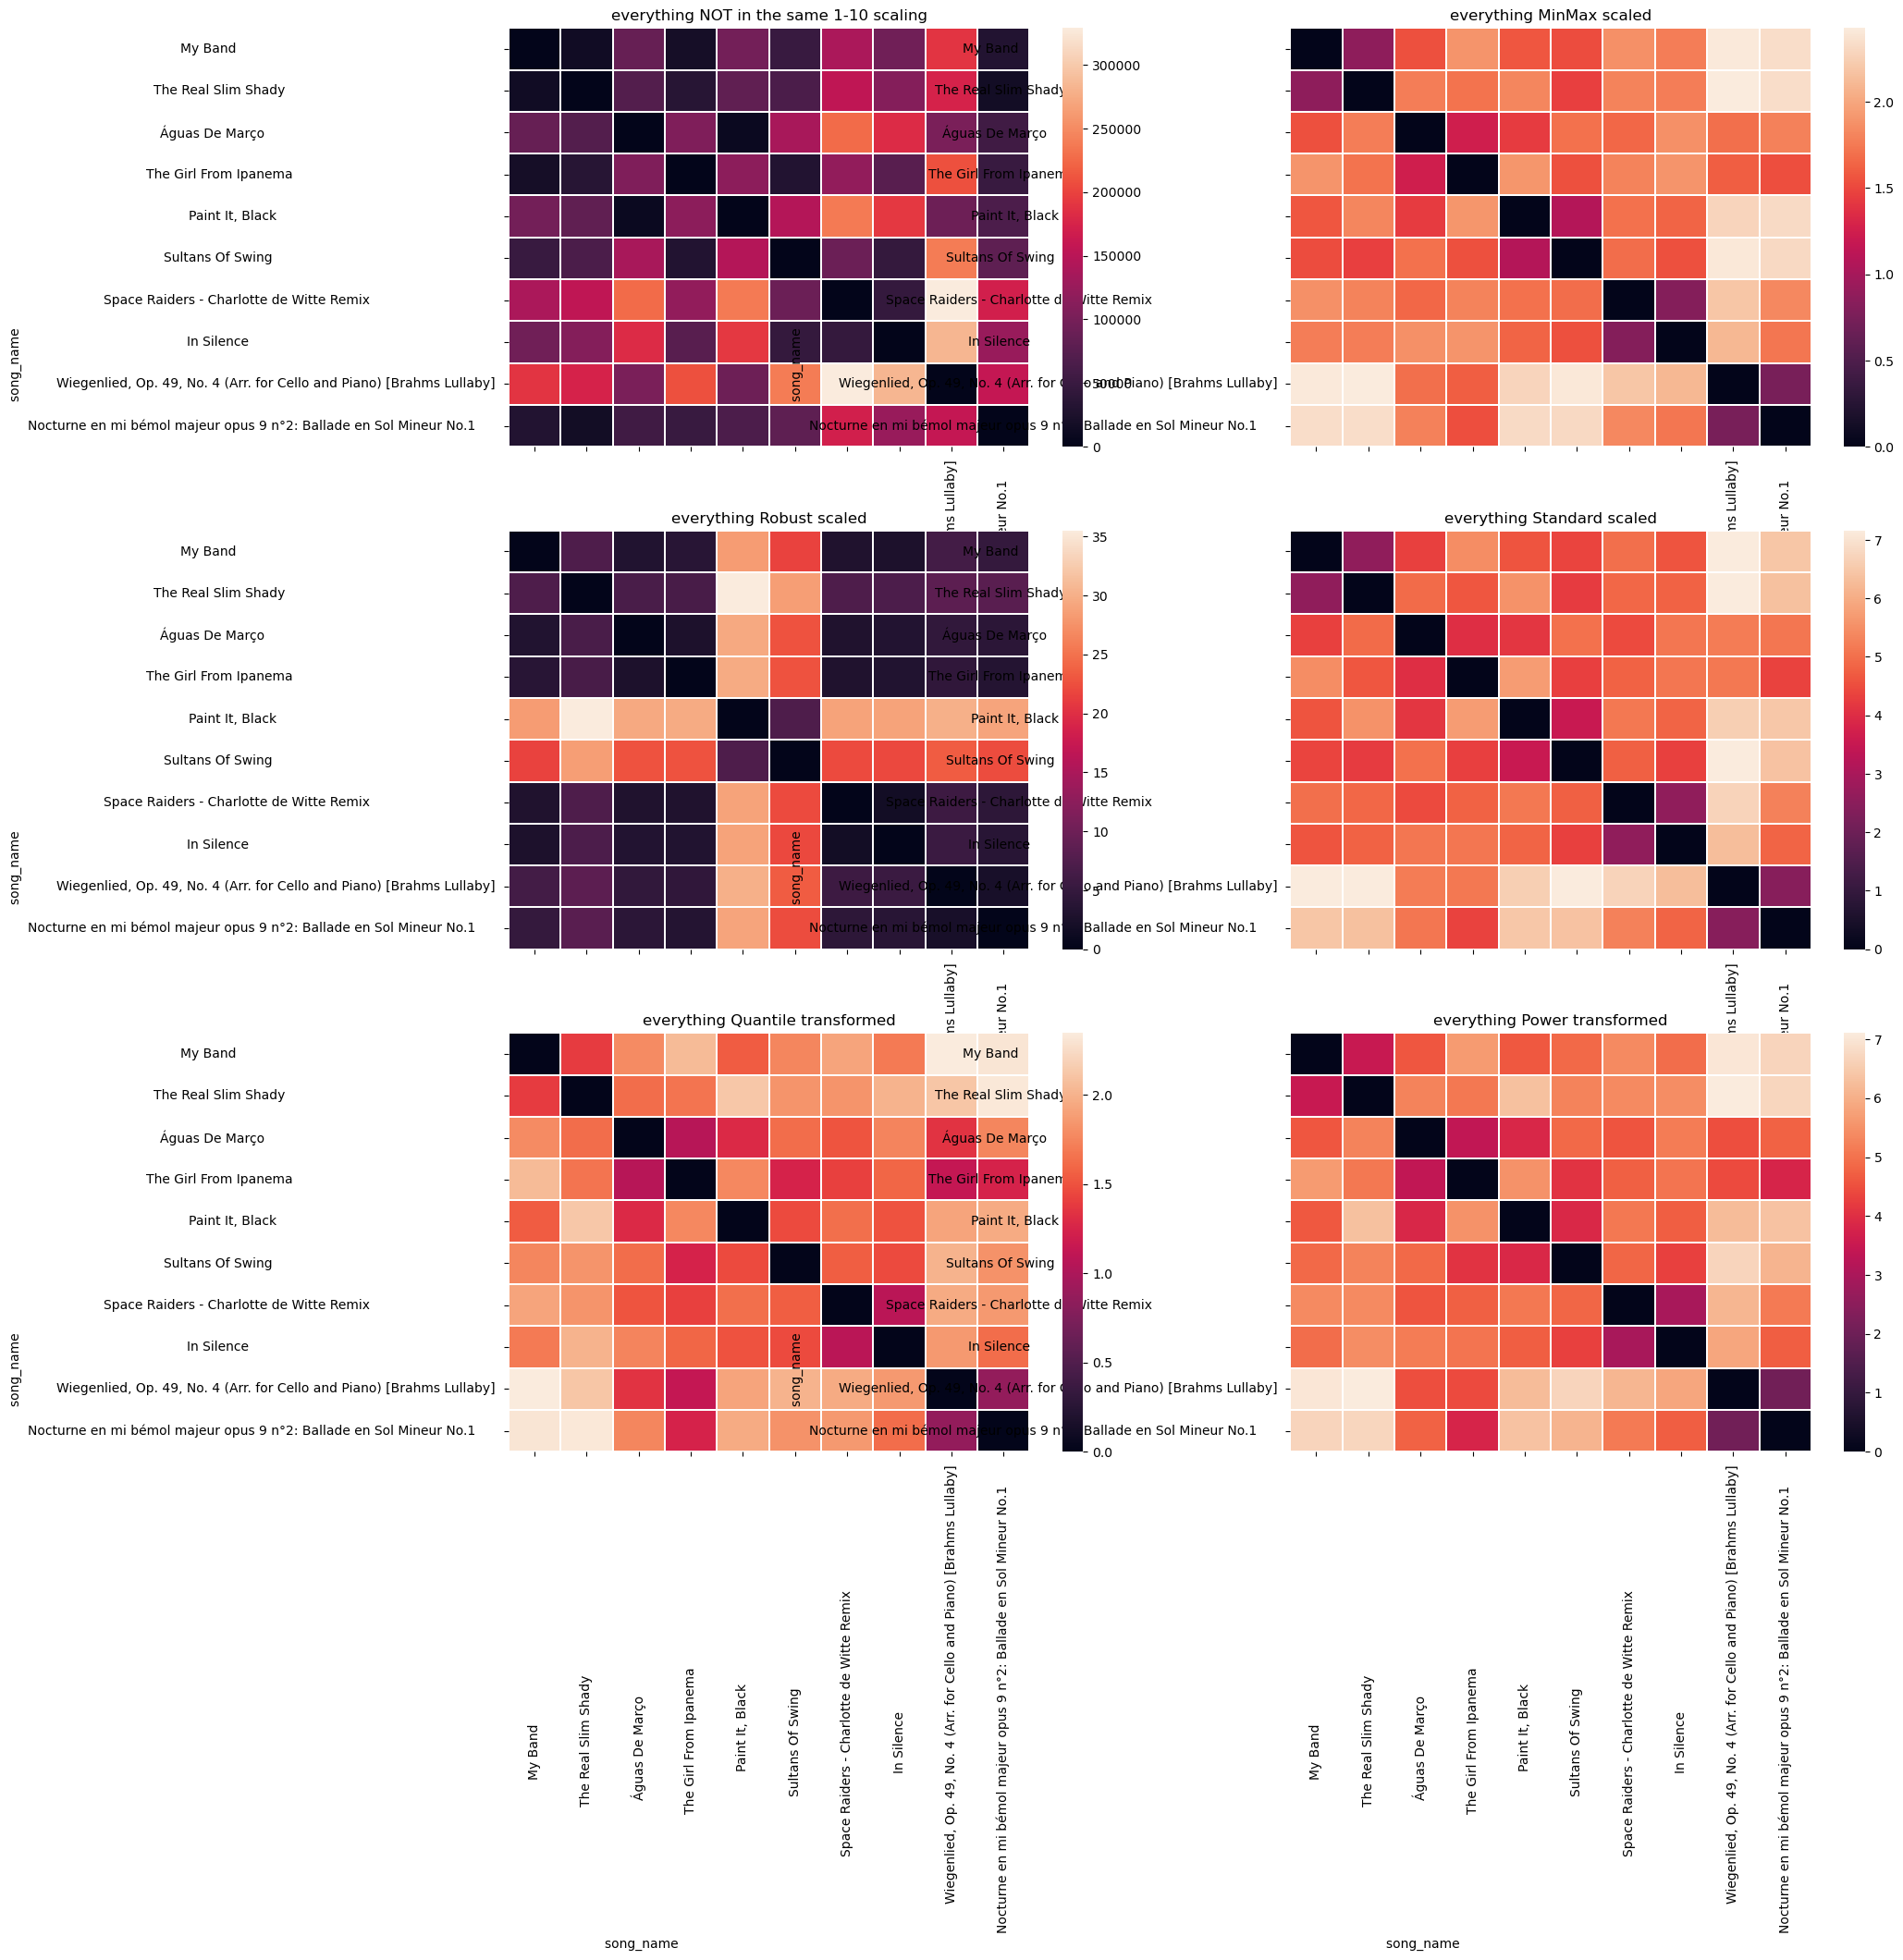

In [94]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(features_distances, ax=ax[0, 0], linewidths=.2);
sns.heatmap(min_max_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(robust_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(standard_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(quantile_distances, ax=ax[2, 0], linewidths=.2);
sns.heatmap(power_distances, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('everything NOT in the same 1-10 scaling')
ax[0, 1].set_title('everything MinMax scaled')
ax[1, 0].set_title('everything Robust scaled')
ax[1, 1].set_title('everything Standard scaled')
ax[2, 0].set_title('everything Quantile transformed')
ax[2, 1].set_title('everything Power transformed')

plt.show()